<img style="float: right;" src="figures/research_commons_logo.png">

# WORKSHOP: INTRODUCTION TO R FOR QUALITATIVE DATA ANALYSIS

* Arthur Marques (GAA)
* Mathurada Jullamon (GAA)


***

# Learning Goals

<img src="figures/gaa-rqda-goals.jpg">

* Understand the basic commands of R and how to use RStudio environment for **qualitative data analisys**

* Learn how to load, preprocess, and explore text

* Learn the basic commands for text manipulation

* Learn basic commands for desccriptive statistics regarding codings, categories, etc.

***

## Overview of quantitative research


This workshop does not address matters as qualitative research design or how to conduct interviews or participant observation fieldwork.



<img src="figures/qualcycle.png">

[source](https://vickysteeves.gitlab.io/2018-ndsr-art/research-interview.html)
***

## Familiarisation & coding

<img src="figures/coding.jpg">

[source](https://vickysteeves.gitlab.io/2018-ndsr-art/analyzing-interview-data.html)

***

## Workshop materials

### `1` Access the UBC research commons R workshop


https://github.com/marquesarthur/research-commons-rqda-workshop


***

### Download the files for this workshop

<img src="figures/download-zip.png">

***

## R environment

### `2` Open RStudio

<img src="figures/R_environment.png">

***

### `3` Create a new R script 

#### File > New file > R Script

<img src="figures/R_Studio.png">

***

### `4` Change your working directory

Set up a folder/path where data are located as a working directory 

<img src="figures/working_directory.png">

***

### R packages

R package is a library of prewritten code designed for a particular task or a collection of tasks

<img src="figures/R_packages.png">

***

### `5` Installing a new package (2 options)



#### Under Tools -> Packages tab -> Search for “psych” and “dplyr”

<img src="figures/install_packages.png">

***

#### `5.1` Using code: install.packages( ) and library( ) functions

```
install.packages("tidyverse")
install.packages("RQDA")
install.packages("tm")
install.packages("wordcloud")
install.packages("topicmodels")
install.packages("igraph")
install.packages("ggplot2")
install.packages("tidytext")
install.packages("dplyr")
install.packages("tidyr")
install.packages("sentimentr")
```

***

### This workshop uses several packages because it intends to describe multiple research methods on qualitative data analysis. Hang tight while packages are installed.

***

### `7` Importing libraries

In [8]:
library(tidyverse)
library(tm)
library(sentimentr)
library(topicmodels)
library(wordcloud)
library(igraph)
library(ggplot2)
library(stringr)
library(tidytext)
library(dplyr)
library(tidyr)
library(RQDA)

#### Tips

**On the editor**

<kbd>CTRL</kbd>+<kbd>enter</kbd> runs the command in the current line (<kbd>cmd</kbd>+<kbd>enter</kbd> on MacOS)

<kbd>CTRL</kbd>+<kbd>w</kbd> closes current tab (<kbd>cmd</kbd>+<kbd>w</kbd> on MacOS)

After typing the first few lines of a command, <kbd>tab</kbd> auto-completes the command

**On the console**

<kbd>↑</kbd> shows the last command (useful to rerun the command of fix errors)

***

# RQDA

<img src="figures/gaa-rqda-goals.jpg">

***

### The RQDA environment

In [ ]:
require("RQDA")

```RQDA() # launches the coding environment```

***

#### Main screen

<img src="figures/rqda-main-screen.png">

***

#### Files tab

<img src="figures/rqda-import-files.png">


#### Our data



The G20 (or Group of Twenty) is an international forum for the governments and central bank governors from 19 countries and the European Union (EU). Founded in 1999 with the aim to discuss policy pertaining to the promotion of international financial stability, the G20 has expanded its agenda since 2008 and heads of government or heads of state, as well as finance ministers and foreign ministers, have periodically conferred at summits ever since. It seeks to address issues that go beyond the responsibilities of any one organization. [source](https://en.wikipedia.org/wiki/G20)


<img style="float: right;" src="figures/g20.jpg" width="20%">


Why G20?

* Lack of public available interview data makes the [UN digital library](https://digitallibrary.un.org/search?ln=en&cc=Speeches)  appealing
* The UN discuss themes that we can relate worldwide (to some extent), e.g., security, employment, climate change, etc
* The facilitator is not an expert in qualitative data analysis and they picked a topic that they are comfortable discussing :)

***

***

#### Open file

<img src="figures/rqda-file-sample.png">

***

#### Codes tab

<img src="figures/rqda-codes.png">

***

#### Coding a file

<img src="figures/rqda-coding-selection.png">

***

#### Coded sentence

<img src="figures/rqda-coded.png">

## Exercise: open the G20-2010-obama file and code some of its senteces.

#### Don't spoil the fun. The stick figure is watching you


<br><br><br><br>


<img src="figures/watch.png" width="30%">

***

#### Open the `rqda-sample.rqda` file and check the coded data

This data was coded by one of the GAAs and it might not be accurate or contain the best themes.

Coding is a subjective process that requires time and cycles, so for the purpose of this workshop, the codings and themes in this sample file suffice


***

#### At the end, our file will look like this

<img src="figures/rqda-code-highlight.png">

#### Explore the sample project and let's get started with analyzing the G20 transcripts

<br><br><br><br>

***

# RQDA commands on RStudio

<img src="figures/gaa-rqda-goals.png">

***

### `1` Loading the data from rqda 

In [9]:
openProject("rqda-sample.rqda")

***

### `2` Extracting files and text

Internally, `rqda` stores data in a `SQL` database. To fetch the data, you have to use the `RQDAQuery` function.

In this workshop, **we provide code snippets for the most common data that you may need from a `.rqda` project**

In [10]:
transcripts <- data.frame(
    name = RQDAQuery("SELECT name FROM source"),
    text = RQDAQuery("SELECT file FROM source")
)

file_names <- transcripts$name

data <- data.frame(
    file=transcripts$name,
    text=transcripts$file
)

***

### `3` Creating a dataset with every file and every sentence

We will make use of the `strsplit` function. 

Internally, every new line in the text is represented as the special character `\n` 

We use this knowledge to split the text into multiple sentences.

This might not be optimal if our input files contain more than one sentence per line. 

Making sure that you transcribe your interviews or input files in a format that *facilitates your work later* is highly desirable.

In [14]:
s <- strsplit(transcripts$file, split = "\n")

sentences <- data.frame(
    name = rep(transcripts$name, sapply(s, length)),
    text = unlist(s)
)

sentences <- sentences %>%
  filter(text != "") %>%
  na.omit()

In [19]:
head(sentences, n= 3)

,name,text
,<fct>,<fct>
1,G20-2010-obama,"Good afternoon, everybody."
2,G20-2010-obama,"Before I discuss the G20, I want to briefly comment on the agreement in Iraq that's taken place on the framework for a new government."
3,G20-2010-obama,"There’s still challenges to overcome, but all indications are that the government will be representative, inclusive, and reflect the will of the Iraqi people who cast their ballots in the last election."


In [21]:
tail(sentences, n= 4)

,name,text
,<fct>,<fct>
643,G20-2011-nicolas-sarkozy,"There are still a lot of things to resolve, particularly on allocating the product of the future tax, but it’s very interesting because when you discuss allocating the product of the future tax it’s because you believe the principle of the tax has made so much progress that it’s appropriate to discuss allocating the product of it."
644,G20-2011-nicolas-sarkozy,"France believes a large share, yet to be defined – a majority of the total – should go to development."
645,G20-2011-nicolas-sarkozy,"Finally, we had a debate on global governance, with a very good report by David Cameron."
646,G20-2011-nicolas-sarkozy,"There you are, ladies and gentlemen; I apologize for no doubt talking for too long. I’ll now take your questions."


<br><br><br><br>

***

# Codes & Categories

<img src="figures/gaa-rqda-goals.png">

***

### `1` Loading the codes from rqda

We load values with the `getCodingTable()` function

In [22]:
head(getCodingTable())

,rowid,cid,fid,codename,filename,index1,index2,CodingLength
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,8,1,foreign policy,G20-2010-obama,52,364,312
2,2,11,1,terrorism,G20-2010-obama,447,629,182
3,3,14,1,democracy,G20-2010-obama,631,837,206
4,4,16,1,economy,G20-2010-obama,1492,1745,253
5,5,16,1,economy,G20-2010-obama,1747,1962,215
6,6,2,1,employment,G20-2010-obama,1980,2166,186


Not all the data matters to us. Particularly, we want the columns with the code name and the files that they appear on

In [39]:
codings <- getCodingTable()[,4:5]
head(codings)

,codename,filename
,<chr>,<chr>
1,foreign policy,G20-2010-obama
2,terrorism,G20-2010-obama
3,democracy,G20-2010-obama
4,economy,G20-2010-obama
5,economy,G20-2010-obama
6,employment,G20-2010-obama


***

### `2` Loading the categories from rqda

In [40]:
categories <- RQDAQuery("SELECT filecat.name AS category, source.name AS filename 
                         FROM treefile, filecat, source 
                         WHERE treefile.catid=filecat.catid
                         AND treefile.fid=source.id AND treefile.status=1")
head(categories)

,category,filename
,<chr>,<chr>
1,2011,G20-2011-obama
2,2012,G20-2012-obama
3,2010,G20-2010-obama
4,2013,G20-2013-obama
5,2014,G20-2014
6,2015,G20-2015


***

### `3` Plotting the extracted codes

In [26]:
# you don't need to runn these two lines. they are only for resizing the plot to the GAA screen
library(repr) 
options(repr.plot.width=18, repr.plot.height=15)

#### `3.1` Use the  `ggplot` function to plot the data

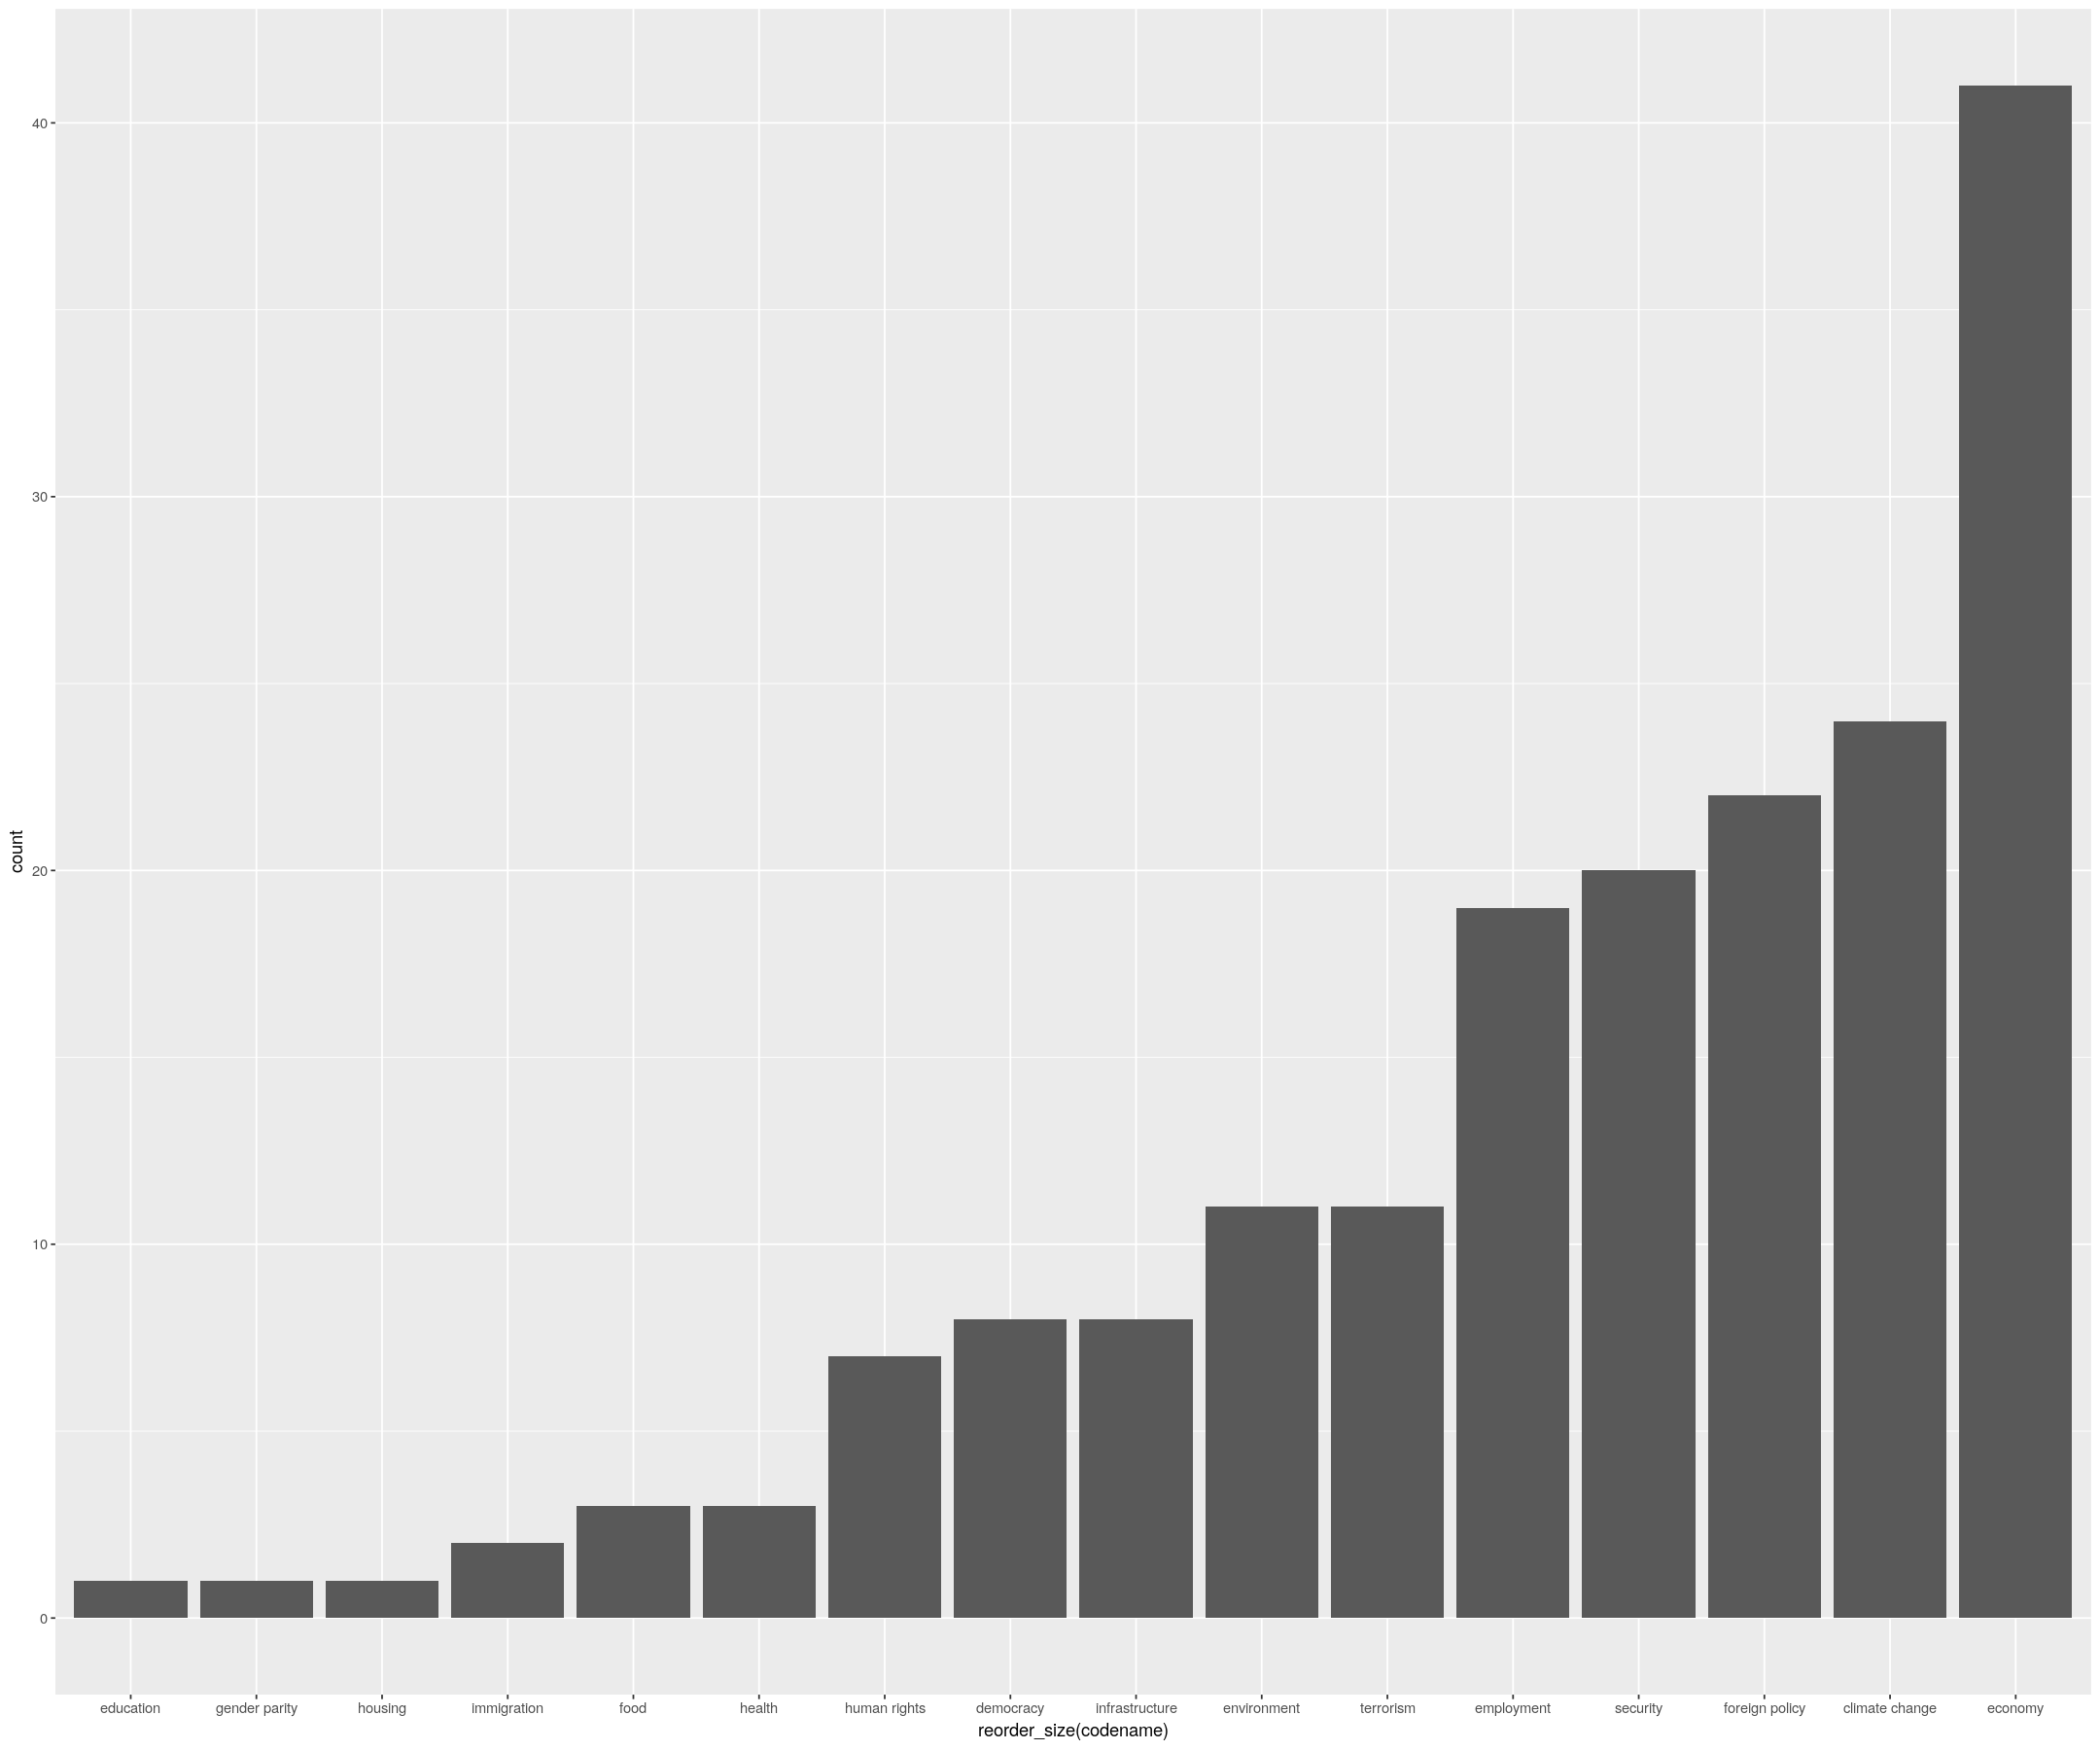

In [41]:
reorder_size <- function(x) {
  factor(x, levels = names(sort(table(x))))
}

plot <- ggplot(data=codings, aes(reorder_size(codename))) + geom_bar(stat="count")  
plot

#### `3.2` Let's use data about the filenames to see each coding per file iwth the `facet_grid` function

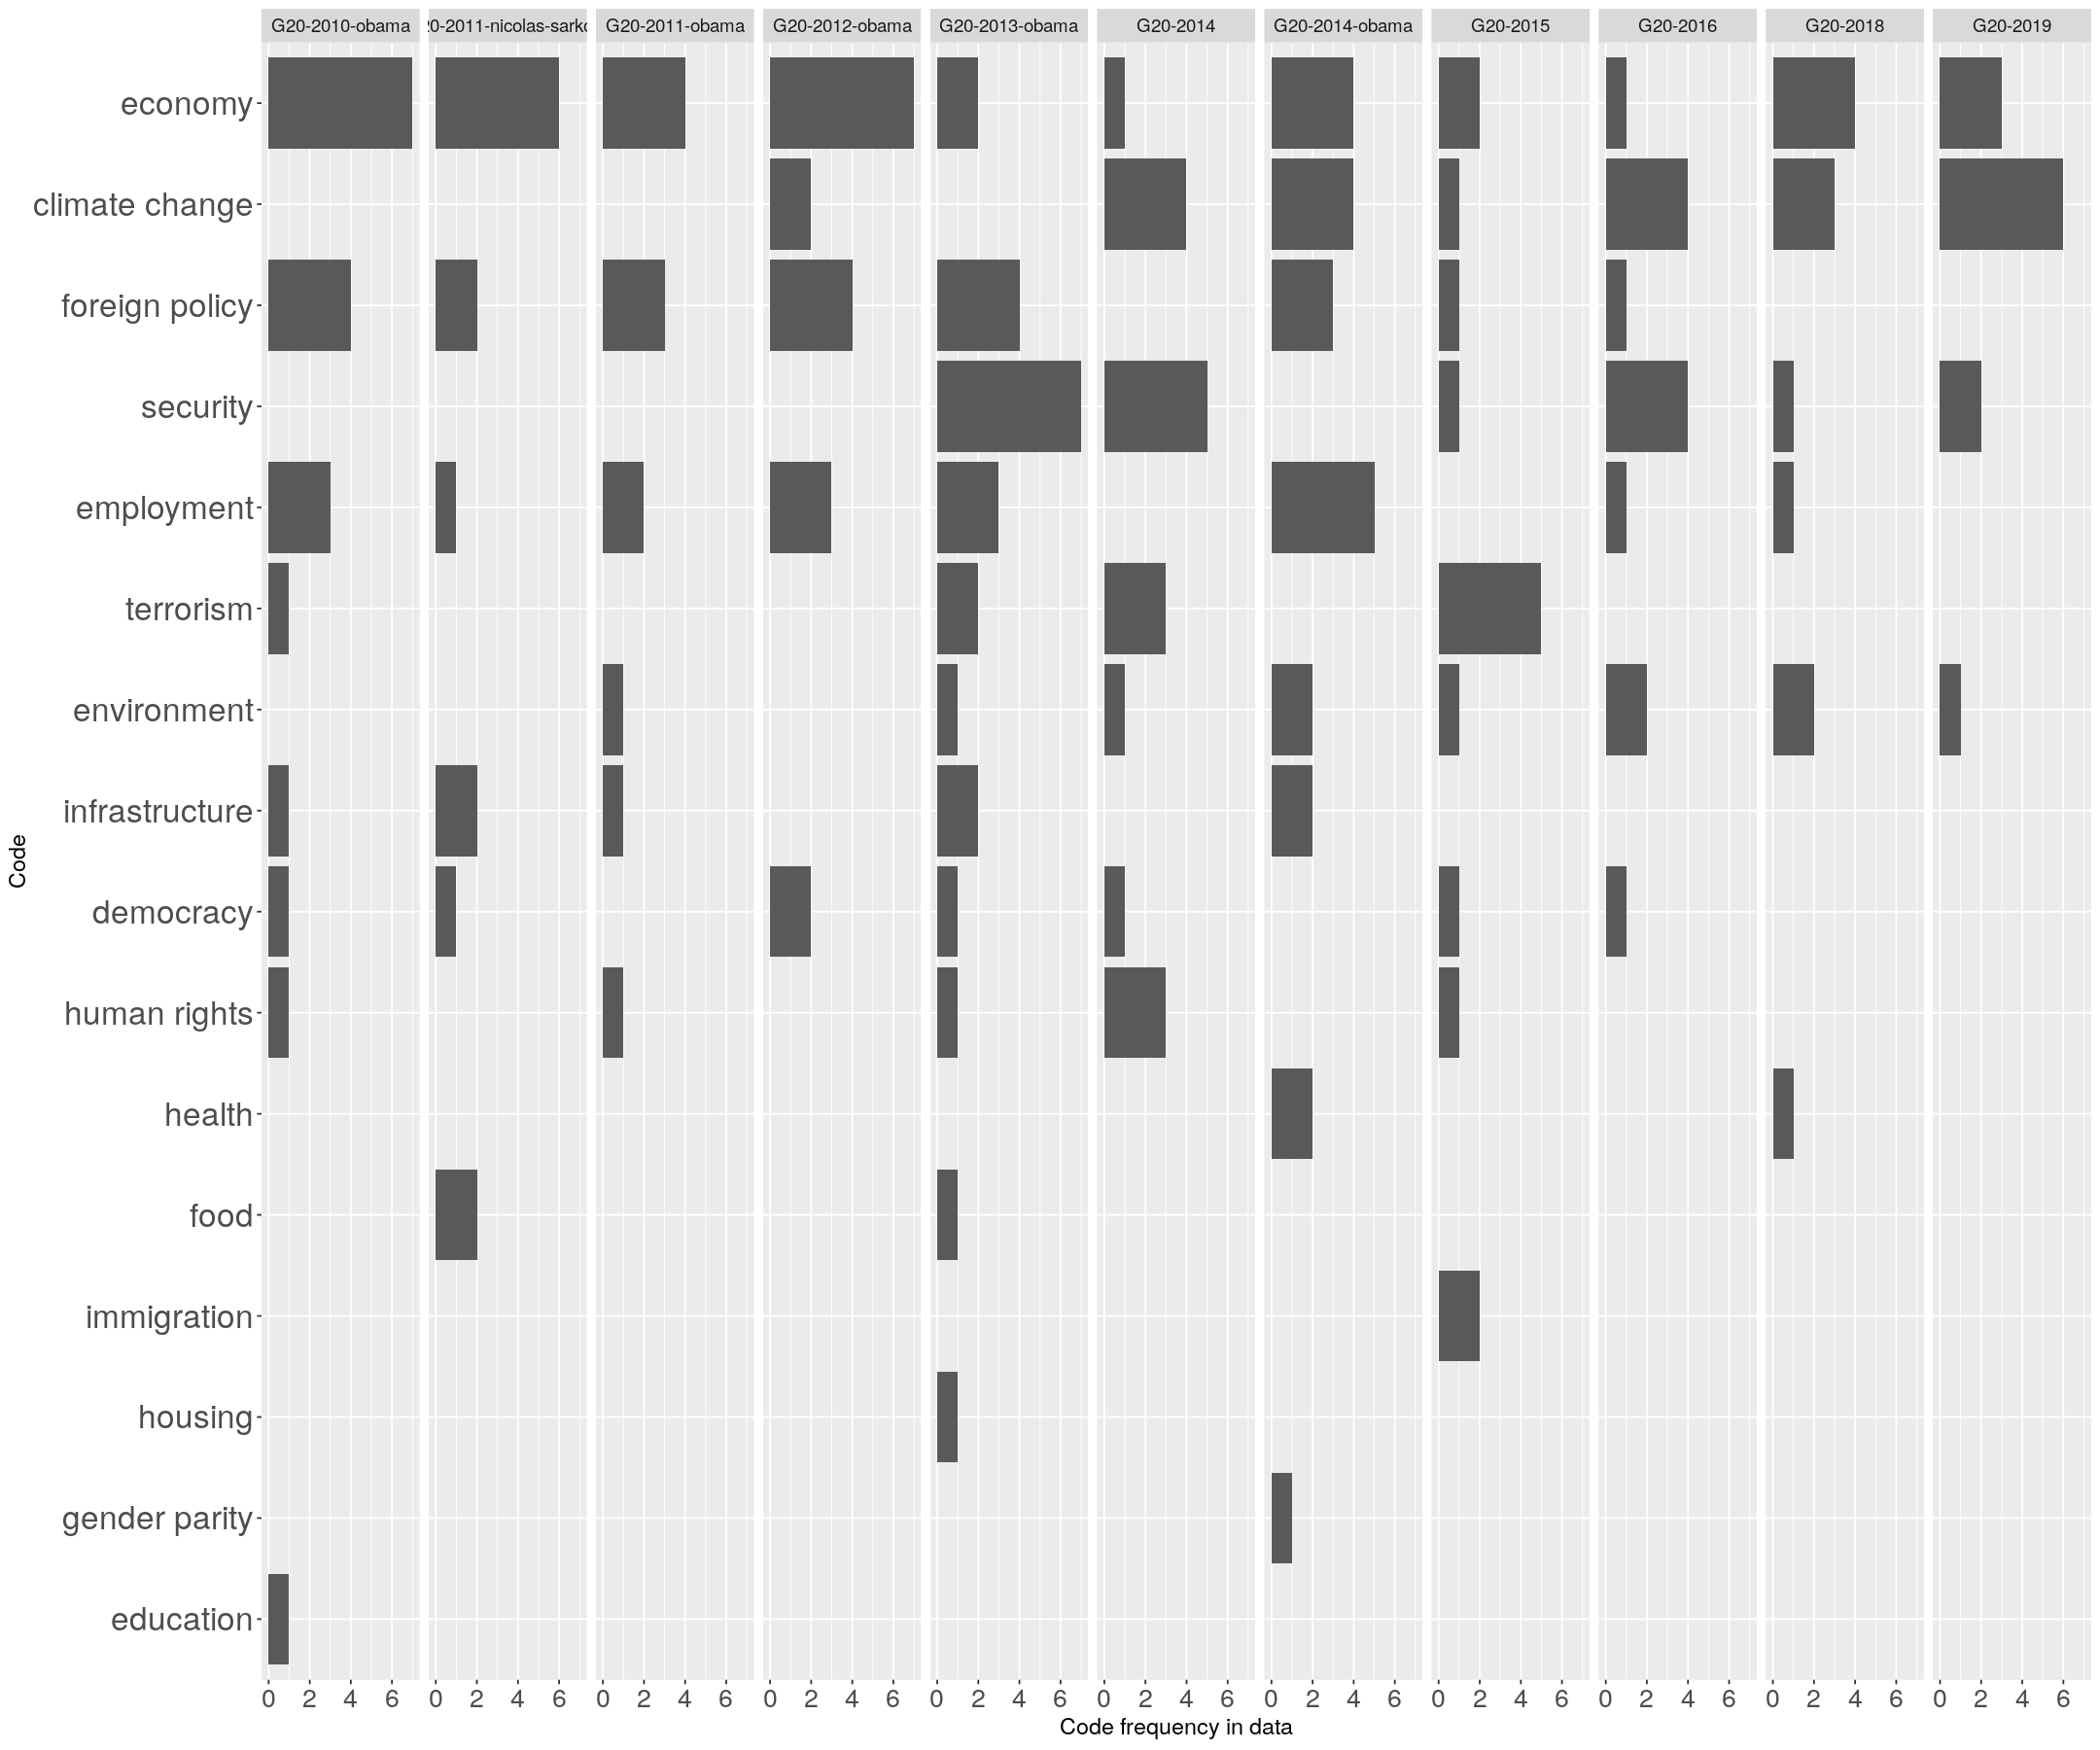

In [42]:
plot <- ggplot(data=codings, aes(reorder_size(codename))) + geom_bar(stat="count")  
plot <- plot + facet_grid(~filename) + coord_flip() 
plot <- plot + theme(
    legend.position="bottom", 
    legend.title=element_blank(),
    text=element_text(size=14),
    axis.text.y=element_text(size=20),
    axis.text.x=element_text(size=16),
    axis.title=element_text(size=14))
plot <- plot + ylab("Code frequency in data") + xlab("Code")
plot

***

#### `3.3` In the plot above, we don't use categories. Let's try a different plot with categories:



In [43]:
head(categories)

,category,filename
,<chr>,<chr>
1,2011,G20-2011-obama
2,2012,G20-2012-obama
3,2010,G20-2010-obama
4,2013,G20-2013-obama
5,2014,G20-2014
6,2015,G20-2015


In [44]:
head(getCodingTable()[,4:5])

,codename,filename
,<chr>,<chr>
1,foreign policy,G20-2010-obama
2,terrorism,G20-2010-obama
3,democracy,G20-2010-obama
4,economy,G20-2010-obama
5,economy,G20-2010-obama
6,employment,G20-2010-obama


***

#### Categories and codes are both tied to a filename. We can merge the data into a single data frame with the `merge` function

In [45]:
codings <- getCodingTable()[,4:5]
codings <- merge(codings, categories, all.y = TRUE)

In [46]:
head(codings)

,filename,codename,category
,<chr>,<chr>,<chr>
1,G20-2010-obama,foreign policy,obama
2,G20-2010-obama,foreign policy,2010
3,G20-2010-obama,foreign policy,G20
4,G20-2010-obama,terrorism,obama
5,G20-2010-obama,terrorism,2010
6,G20-2010-obama,terrorism,G20


***

#### Once again, we can count the number of times a codename appears. The only difference is that we will use the `fill` parameter to distinguish codenames

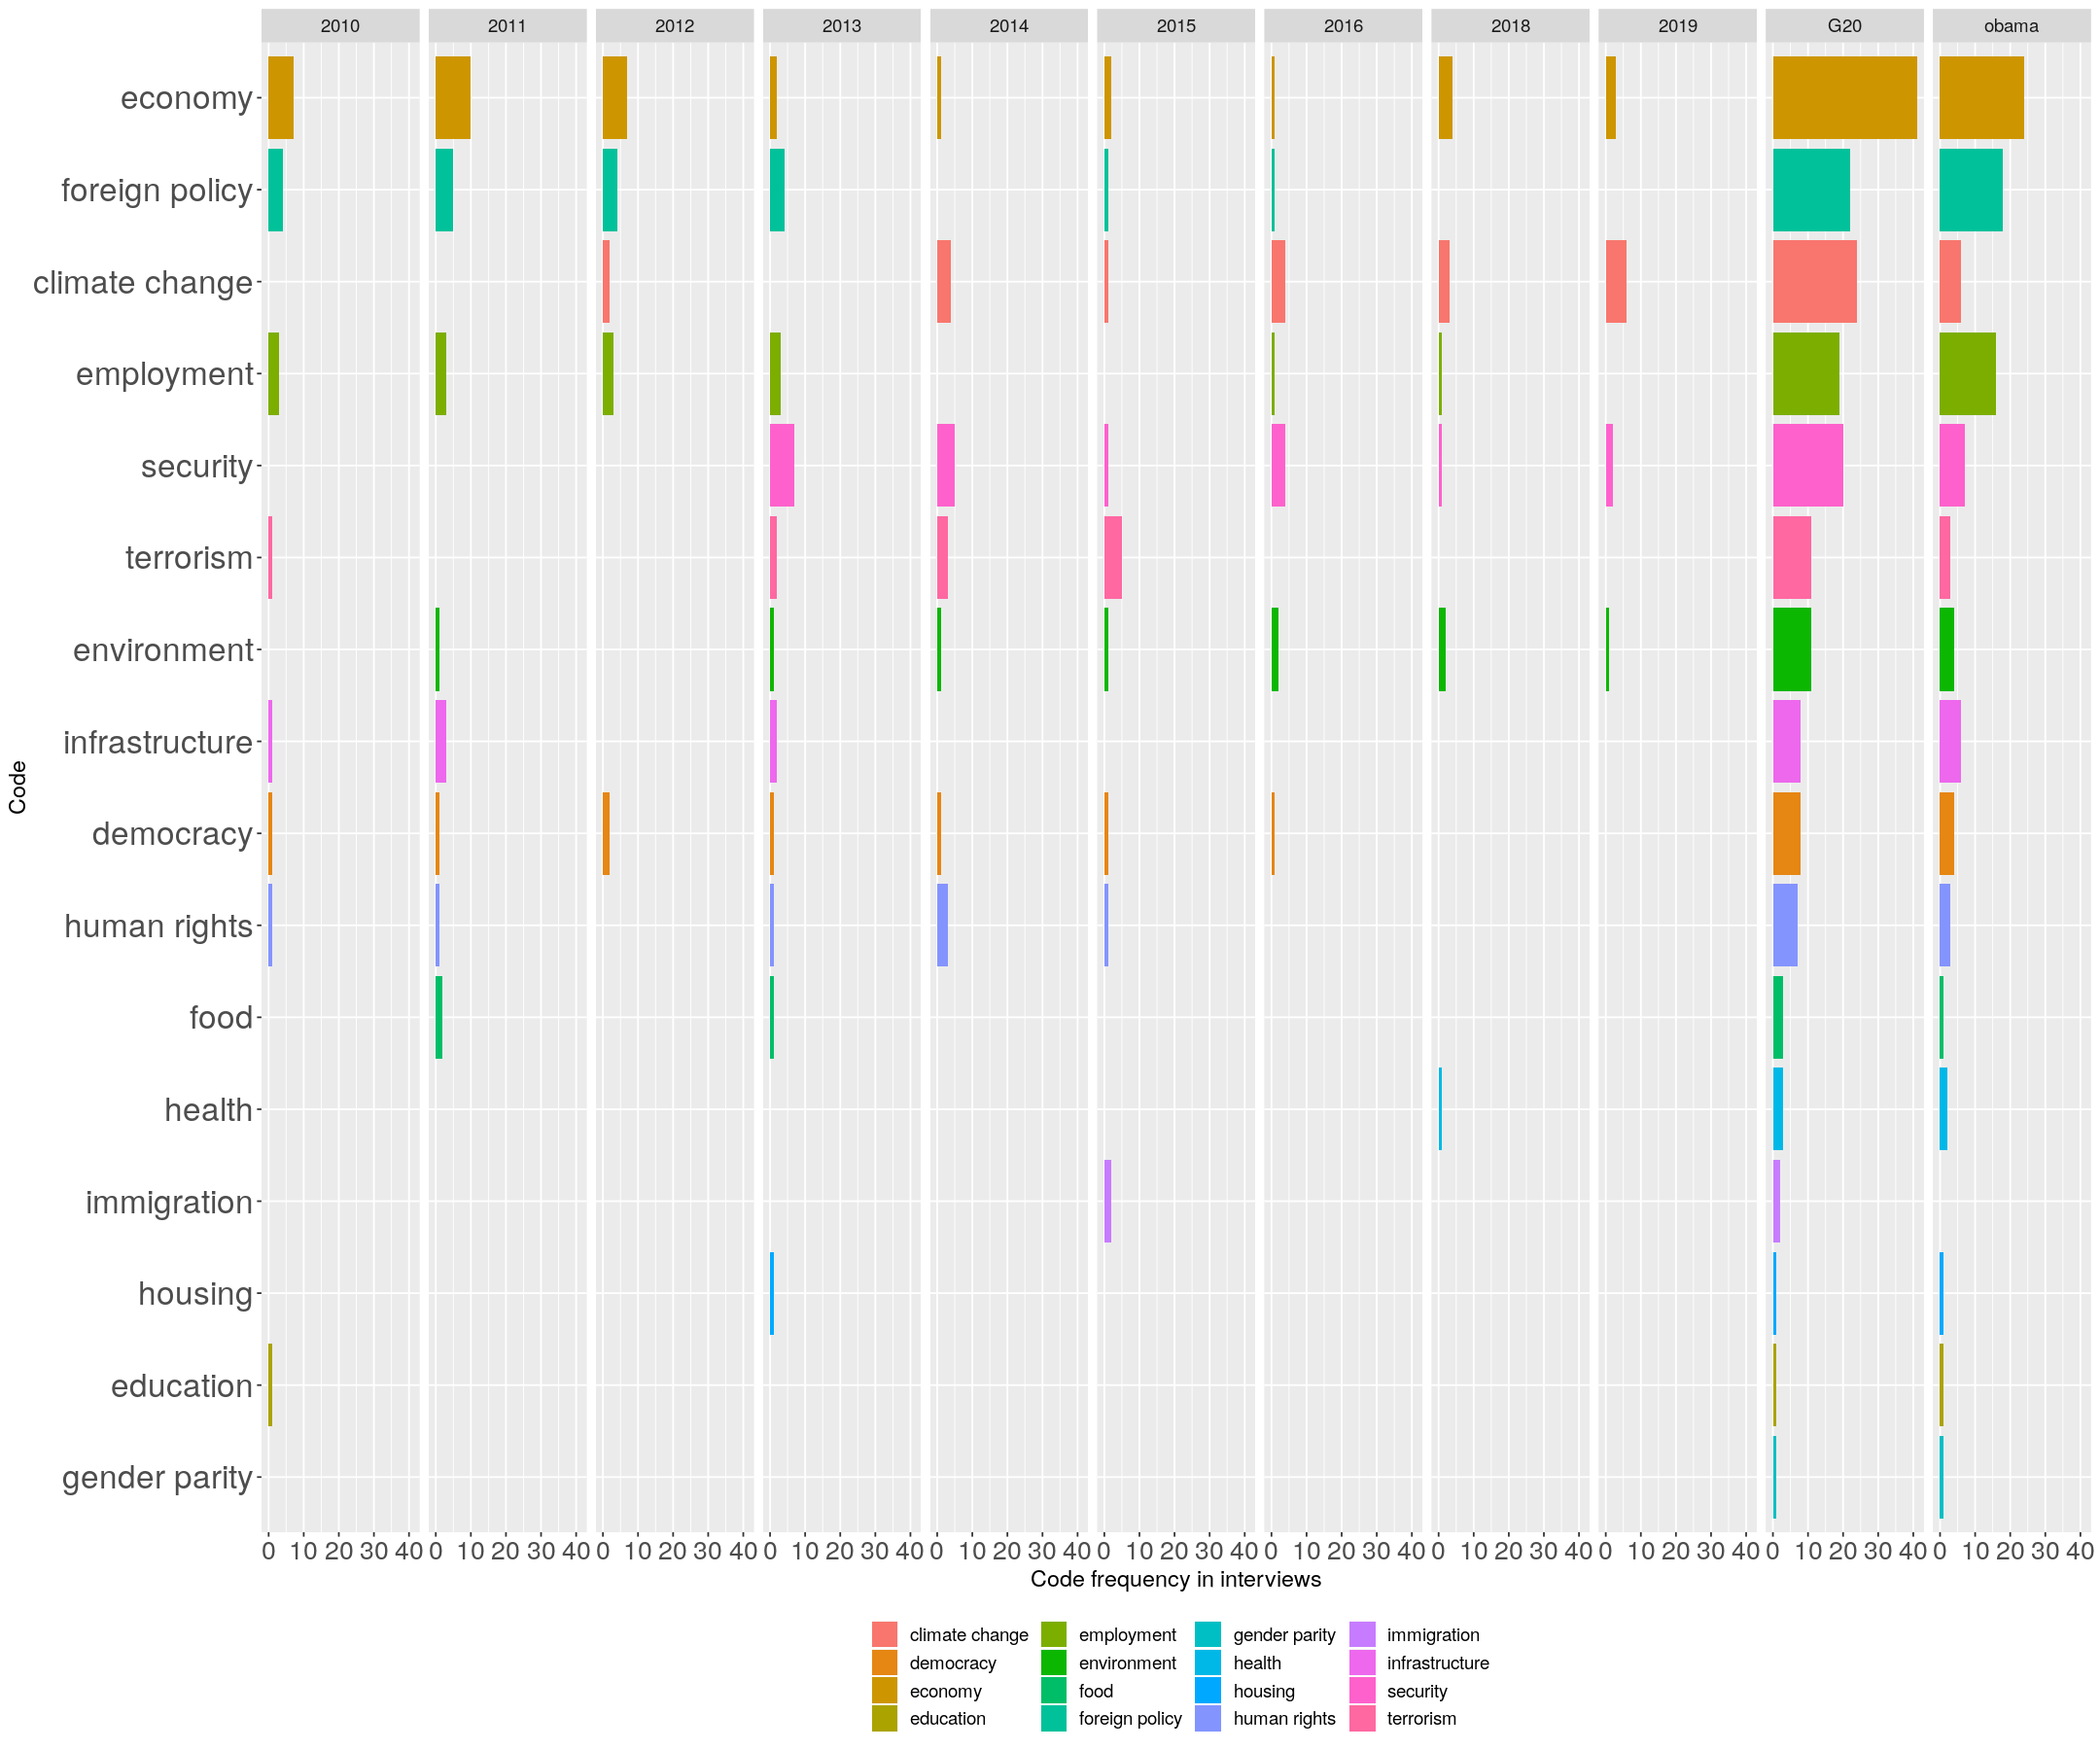

In [49]:
plot <- ggplot(codings, aes(reorder_size(codename), fill=codename)) + geom_bar(stat="count")
plot <- plot + facet_grid(~category) + coord_flip() 
plot <- plot + theme(
    legend.position="bottom", 
    legend.title=element_blank(),
    text=element_text(size=14),
    axis.text.y=element_text(size=20),
    axis.text.x=element_text(size=16),
    axis.title=element_text(size=14))
plot <- plot + ylab("Code frequency in interviews") + xlab("Code")
plot

Depending on how you organize your categories, this plot may change drastically. For more examples of plots check this [rqda tutorial](https://lucidmanager.org/qualitative-data-science/).

## From the coded data, we can infer things suchs as:

1. As the initial purpose of the G20, **economy** is still a major theme in any summit
1. **Climate change** is gaining momentum. In early years, it was not a theme open for discussion at all whereas in the past few years, it is being discussed more than economy
1. **Employment** was a theme brought in many of the early year summits. It makes sense as [Europe was in a recession period](https://en.wikipedia.org/wiki/Great_Recession_in_Europe)

<br><br><br><br>

***

# Text Mining

<img src="figures/gaa-rqda-goals.png">

***

### `1` Getting the text related to each code element

In [51]:
coded_text <- RQDAQuery(
    "SELECT coding.cid, source.name AS filename, coding.seltext
     FROM coding, source
     WHERE coding.fid=source.id")

In [52]:
cdata <- merge(coded_text, getCodingTable()[, c("cid", "codename")], by="cid") %>%
    rename(text=seltext) %>%
    select(codename, filename, text)

### `2` Once we have the data we can sample quotes related to each theme

1. First, we filter text whose codename match what we are looking for
1. Then, we can use `head`, `tail` or `nrow` to get samples sentences
    * `head` picks the first rows in our data
    * `tail` picks the last rows in our data
    * `nrow` is the most complex. It picks random rows


In [53]:
sample <- cdata %>% filter(codename == "climate change")
head(sample, n=3)

,codename,filename,text
,<chr>,<chr>,<chr>
1,climate change,G20-2018,I am here to announce that I will be leaving later today to attend two important meetings on two of the most pressing challenges of our times: advancing a fair globalization and accelerating climate action.
2,climate change,G20-2018,I am here to announce that I will be leaving later today to attend two important meetings on two of the most pressing challenges of our times: advancing a fair globalization and accelerating climate action.
3,climate change,G20-2018,I am here to announce that I will be leaving later today to attend two important meetings on two of the most pressing challenges of our times: advancing a fair globalization and accelerating climate action.


In [54]:
sample <- cdata %>% filter(codename == "employment")

tail(sample, n= 3)

,codename,filename,text
,<chr>,<chr>,<chr>
359,employment,G20-2010-obama,"In short, we succeeded in putting the global economy back on the path of recovery -- but we also know that the progress has not come nearly fast enough, especially when it comes to my highest priority, which is putting Americans back to work."
360,employment,G20-2010-obama,"In short, we succeeded in putting the global economy back on the path of recovery -- but we also know that the progress has not come nearly fast enough, especially when it comes to my highest priority, which is putting Americans back to work."
361,employment,G20-2010-obama,"In short, we succeeded in putting the global economy back on the path of recovery -- but we also know that the progress has not come nearly fast enough, especially when it comes to my highest priority, which is putting Americans back to work."


In [55]:
sample <- cdata %>% filter(codename == "security")

sample[sample(nrow(sample), 3), ] # this line picks 3 random rows

,codename,filename,text
,<chr>,<chr>,<chr>
190,security,G20-2016,"In Sri Lanka, I stressed that ongoing efforts in peacebuilding, reconciliation and post-conflict transformation, including transitional justice, provide an opportunity for this country to emerge from this trauma stronger."
208,security,G20-2014,"I urge the world leaders gathered in New York, especially those participating in tomorrow’s Security Council Summit on foreign terrorist fighters, to come together decisively in support of efforts to confront these groups."
107,security,G20-2018,And an undercurrent of geopolitical tensions is adding further pressure to the global economy.


In [56]:
sample <- cdata %>% filter(codename == "terrorism")

sample[sample(nrow(sample), 3), ] # this line picks 3 random rows

,codename,filename,text
,<chr>,<chr>,<chr>
28,terrorism,G20-2015,"Terrorism is a threat to all humankind. As we have seen over the years with grim regularity, no country, and no city, nobody is immune. In the past four days alone, horrendous terrorist bombings have also killed dozens of people in Beirut and Baghdad."
55,terrorism,G20-2013-obama,It increases the risk that these weapons will fall into the hands of terrorist groups
84,terrorism,G20-2014,"I urge the world leaders gathered in New York, especially those participating in tomorrow’s Security Council Summit on foreign terrorist fighters, to come together decisively in support of efforts to confront these groups."


<br><br><br><br>

***

# Word Cloud

#### To build a word cloud, we need to count the number of times each word (i.e., `term`) appears in each document

#### This is also known as a `document term matrix`, e.g.

<img src="figures/dtm.png">

[source](https://www.quora.com/What-is-a-term-document-matrix)

***

#### We use the `VectorSource` and `Corpus` functions from the text-mining (`tm`) package to build a document term matrix

Notice that there are very common words in some languages. For instance, in `English` words like `a`, `an`, `is`, `'t`, `have`, etc are pretty common and we need to remove them from our corpus. Otherwise, they would appear as part of the word cloud. 

We call these common words `stopwords` and the entire document-term-matrix is built with the following code snippet:

In [57]:
document_term_matrix <- function(data) {
    text <- Corpus(VectorSource(data))
    text <-  tm_map(text, stripWhitespace)
    text <-  tm_map(text, content_transformer(tolower))
    text <-  tm_map(text, removeWords, stopwords("english"))
    text <-  tm_map(text, removePunctuation)
    text <-  tm_map(text, removeNumbers)
}

In [59]:
tdm <- document_term_matrix(sentences$text)

Warning message in tm_map.SimpleCorpus(text, stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(text, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(text, removeWords, stopwords("english")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(text, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(text, removeNumbers):
“transformation drops documents”


*** 

### `3` Plotting the word cloud

In [60]:
# you don't need to runn these two lines. they are only for resizing the plot to the GAA screen
options(repr.plot.width=12, repr.plot.height=8)
set.seed(42)

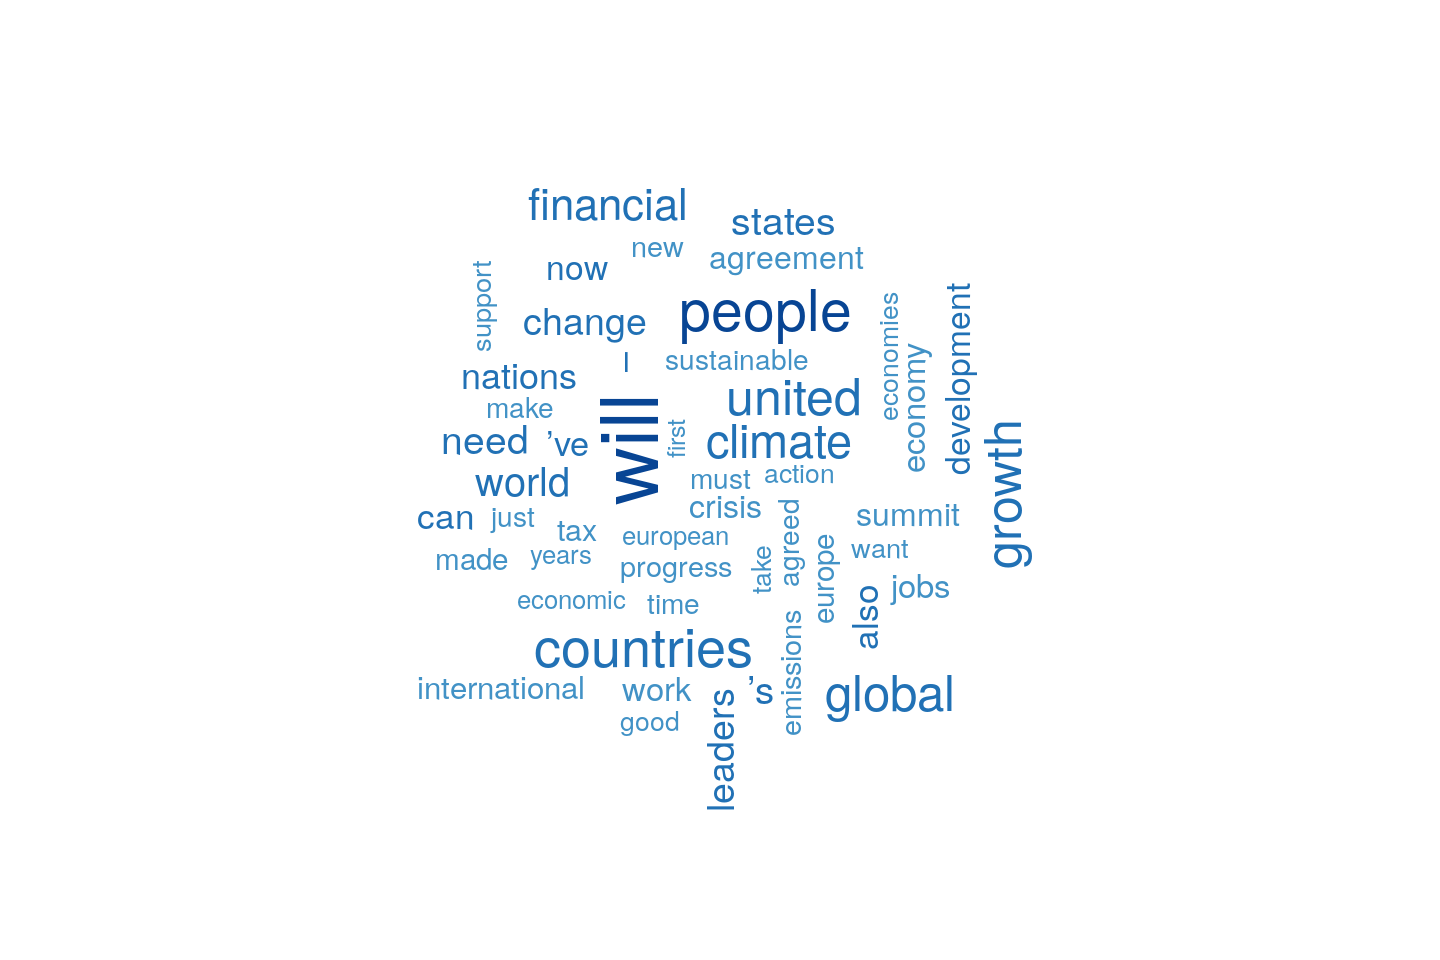

In [61]:
wordcloud(tdm, min.freq = 10, max.words = 50, rot.per=0.35, colors = brewer.pal(8, "Blues")[-1:-5])

<br><br><br><br>

***

# N-grams


In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. Using Latin numerical prefixes:

1. an n-gram of size 1 is referred to as a "unigram";
1. size 2 is a "bigram" (or, less commonly, a "digram");
1. size 3 is a "trigram".

<img src="figures/ngram-example-2.png">


[source](https://devopedia.org/n-gram-model)

#### Let's recall the sentences data frame

In [62]:
head(sentences)

,name,text
,<fct>,<fct>
1,G20-2010-obama,"Good afternoon, everybody."
2,G20-2010-obama,"Before I discuss the G20, I want to briefly comment on the agreement in Iraq that's taken place on the framework for a new government."
3,G20-2010-obama,"There’s still challenges to overcome, but all indications are that the government will be representative, inclusive, and reflect the will of the Iraqi people who cast their ballots in the last election."
4,G20-2010-obama,This agreement marks another milestone in the history of modern Iraq.
5,G20-2010-obama,"Once again, Iraqis are showing their determination to unify Iraq and build its future and that those impulses are far stronger than those who want Iraq to descend into sectarian war and terror."
6,G20-2010-obama,"For the last several months, the United States has worked closely with our Iraqi partners to promote a broad-based government -- one whose leaders share a commitment to serving all Iraqis as equal citizens."


#### We can extract bigrams using the `unnest_tokens` function.

The function only works with the `%>%` environment. Once you use it, you can start exploring the n-grams in your data

*** 

### `1` Bigrams

In [66]:
bigrams <- sentences %>%
    unnest_tokens(bigram, text, token = "ngrams", n = 2) %>%
separate(bigram, c("word1", "word2"), sep = " ")  

In [68]:
head(bigrams)

,name,word1,word2
,<fct>,<chr>,<chr>
1,G20-2010-obama,good,afternoon
2,G20-2010-obama,afternoon,everybody
3,G20-2010-obama,everybody,before
4,G20-2010-obama,before,i
5,G20-2010-obama,i,discuss
6,G20-2010-obama,discuss,the


In [75]:
sentences %>%
    unnest_tokens(bigram, text, token = "ngrams", n = 2) %>%
    count(bigram, sort = TRUE) %>%
    head(10)

bigram,n
<chr>,<int>
of the,100
in the,65
the united,50
to the,39
the g20,34
and the,33
united states,33
climate change,30
on the,29


*** 

### `2` Trigrams

In [74]:
sentences %>%
    unnest_tokens(bigram, text, token = "ngrams", n = 3) %>% # the only difference is n = 3
    count(bigram, sort = TRUE) %>%
    head(5)

bigram,n
<chr>,<int>
the united states,33
the global economy,17
i want to,16
the united nations,16
we need to,16


<br><br><br><br>

***

# Sentiment Analysis

<img src="figures/gaa-rqda-goals.png">


Jurafsky defines sentiment analysis as the extraction of sentiment, the positive or negative orientation that a writer expresses toward some object.

Sentiment analysis is useful in discourse analysis and many other fields. 

***

### `1` We use the `sentimentr` for sentiment analysis. 

There are other available packages, but I `sentimentr` was ease to use with the `%>%` operator. So it is consistent with some other samples in this workshop.

***

### `2` We can extract sentiments using the `sentiment( )` function.

In [78]:
sentiments <- sentences %>%
    filter(name == "G20-2011-obama") %>%
    get_sentences(text) %>% 
    sentiment() %>%
    mutate(sentence_id = row_number())

In [79]:
head(sentiments)

,name,text,element_id,sentence_id,word_count,sentiment
,<fct>,<chr>,<int>,<int>,<int>,<dbl>
1,G20-2011-obama,"Good afternoon, everybody.",1,1,3,0.43301270
2,G20-2011-obama,"I want to begin by thanking my friend, President Sarkozy, for his leadership and his hospitality.",2,2,16,0.70000000
3,G20-2011-obama,And I want to thank the people of Cannes for this extraordinary setting.,3,3,13,0.34668762
4,G20-2011-obama,"Over the past two years, those of us in the G20 have worked together to rescue the global economy, to avert another depression, and to put us on the path to recovery.",4,4,32,0.07071068
5,G20-2011-obama,But we came to Cannes with no illusions.,5,5,8,0.08838835
6,G20-2011-obama,The recovery has been fragile.,6,6,5,-0.11180340


***

### `3` Plotting sentiments throughout a speech

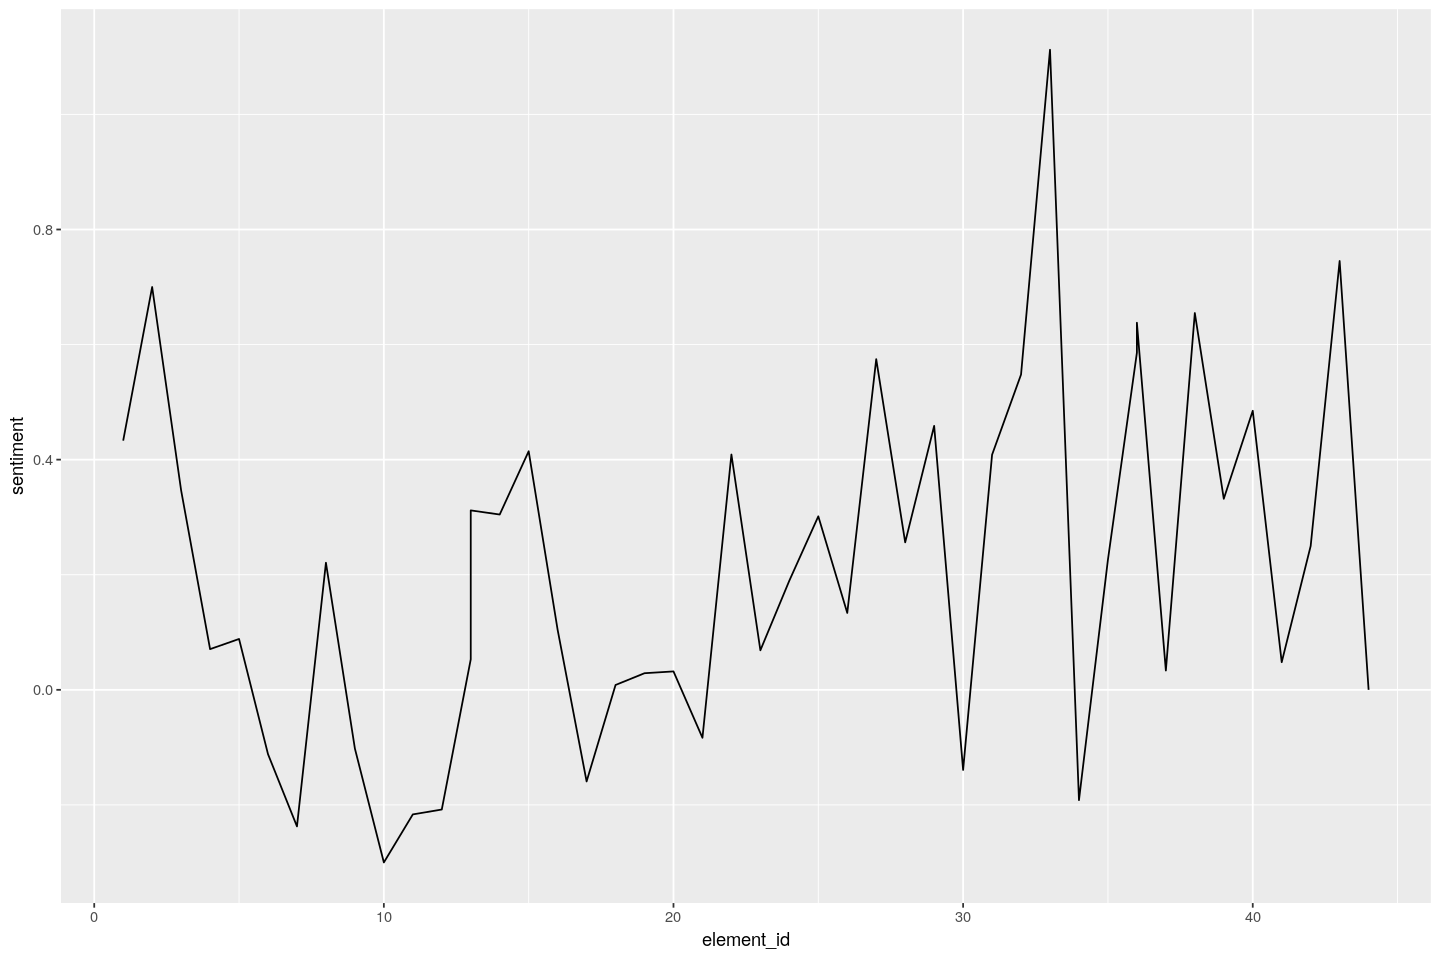

In [81]:
ggplot(data=sentiments, aes(x=element_id, y=sentiment)) + geom_line()

***

### `4` Comparing the speech of two speakers over the same G20 summit

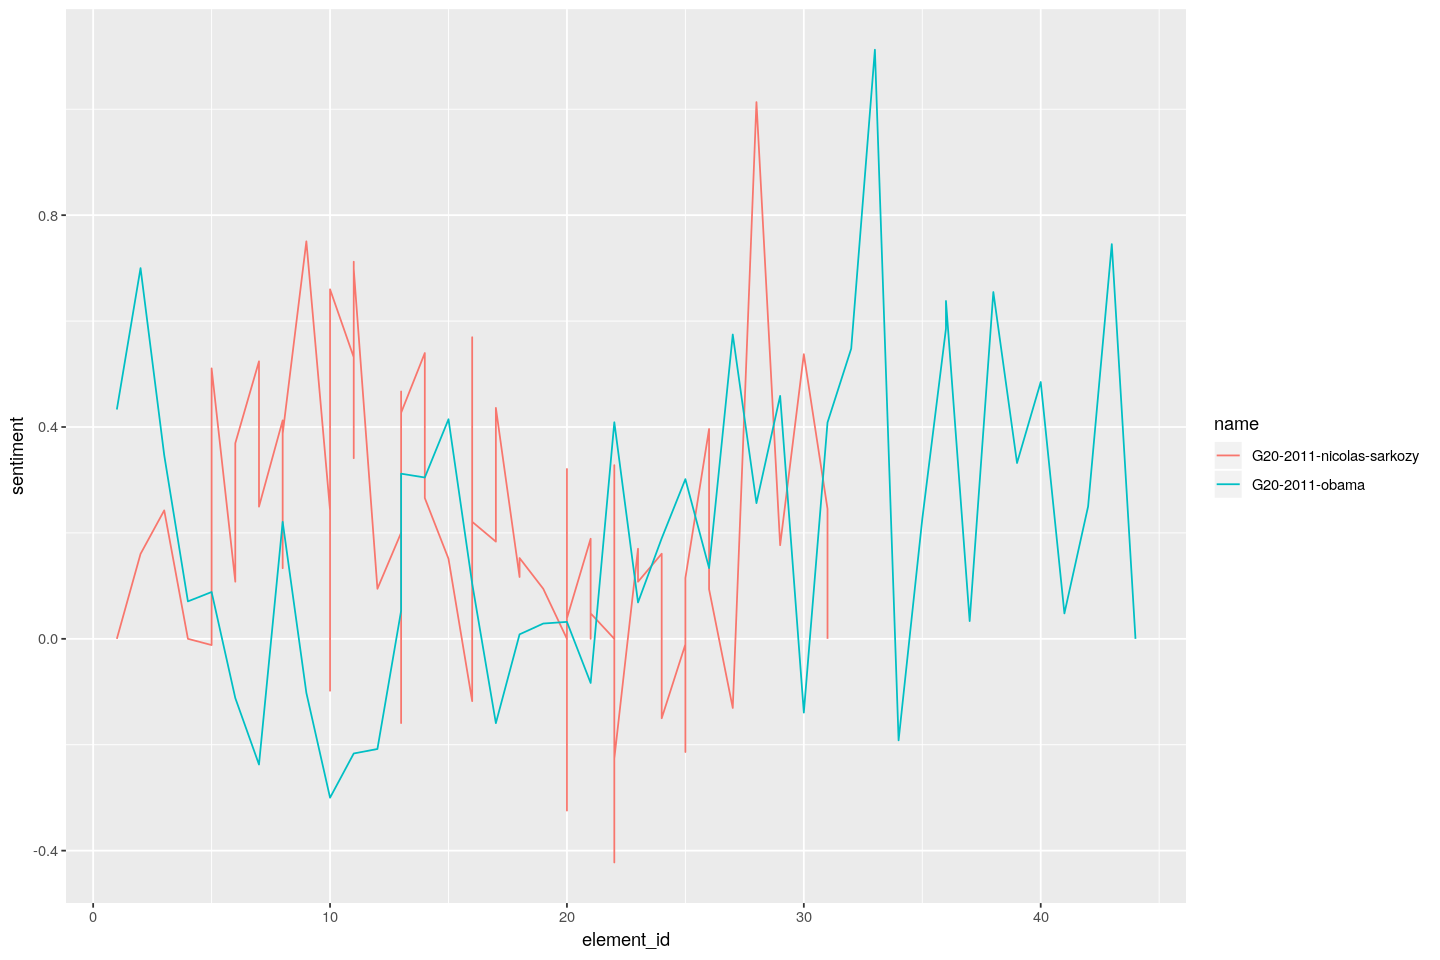

In [83]:
obama <- sentences %>%
    filter(name == "G20-2011-obama") %>%
    get_sentences(text) %>% 
    sentiment() %>%
    mutate(sentence_id = row_number())

sarkozy <- sentences %>%
    filter(name == "G20-2011-nicolas-sarkozy") %>%
    get_sentences(text) %>% 
    sentiment() %>%
    mutate(sentence_id = row_number())

sentiments <- rbind(obama, sarkozy)
ggplot(data=sentiments, aes(x=element_id, y=sentiment, color=name)) + geom_line()

***

### `5` Visializing positive and negative sentences with `highlight`

<img src="figures/obama.png">

In [84]:
sentences %>%
    mutate(text=as.character(text)) %>%
    filter(name == "G20-2011-obama") %>%
    mutate(data = get_sentences(text)) %$%
    sentiment_by(data, name) %>%
    highlight()

Saved in /tmp/RtmpQ0xK8H/polarity.html

Opening /tmp/RtmpQ0xK8H/polarity.html ...



In [85]:
sentences %>%
    mutate(text=as.character(text)) %>%
    filter(name == "G20-2011-nicolas-sarkozy") %>%
    mutate(data = get_sentences(text)) %$%
    sentiment_by(data, name) %>%
    highlight()

Saved in /tmp/RtmpQ0xK8H/polarity.html

Opening /tmp/RtmpQ0xK8H/polarity.html ...



<br><br><br>


***

# Topic Modeling

(tentatively, as the workshop is already too long and topic modeling is a complex topic - pun intended)

<img src="figures/gaa-rqda-goals.png">

A topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. Intuitively, given that a document is about a particular topic, one would expect particular words to appear in the document more or less frequently: "dog" and "bone" will appear more often in documents about dogs, "cat" and "meow" will appear in documents about cats, and "the" and "is" will appear equally in both. [source](https://en.wikipedia.org/wiki/Topic_model)

<img src="figures/topic-modeling.gif">

[source](https://aws.amazon.com/blogs/machine-learning/introduction-to-the-amazon-sagemaker-neural-topic-model/)

***

We can apply topic modeling both at `the sentence level` or at `the document level`.

Notice that this is a methodology that relies on statistics and probability. There are no explicit themes or categories that arise from a topic and you will have to reason whether the topics make sense or not. 

Nonetheless, topic modeling is a powerful tool and it might help you analyzing large chunks of text. 



***

#### Let's apply topic modeling to our G20 data.

## Topic modeling at the document level

#### `1`  First, we must define the number of topics

In [87]:
n_topics = 9
n_top_words = 10

#### `2`  Once again, we make use of the document term matrix

In [91]:
# the 1st function converts the text to an input format used in the 2nd function
dtm <- document_term_matrix(data$text) 
dtm <- DocumentTermMatrix(dtm)
dtm <- removeSparseTerms(dtm, 0.99)

Warning message in tm_map.SimpleCorpus(text, stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(text, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(text, removeWords, stopwords("english")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(text, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(text, removeNumbers):
“transformation drops documents”


#### `3` Finally, we apply the `LDA` function to extract topics

In [92]:
ldaOut <- LDA(dtm, k = n_topics)

#### `4` We can check the top words that make a topic. Using these words, we may assign a label to a topic

In [93]:
terms(ldaOut, n_top_words)

Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
will,tax,will,need,people,people,growth,growth,will
global,financial,people,will,’ve,states,united,must,climate
countries,–,emissions,climate,weapons,united,countries,need,change
must,’s,climate,relation,world,jobs,development,states,nations
people,countries,countries,global,economy,progress,leaders,united,united
agreement,made,world,change,nations,will,sustainable,agreed,–
also,transaction,change,also,can,american,will,agreement,need
development,growth,global,international,continue,made,states,economies,syria
leaders,will,just,political,global,’ve,europe,seoul,groups
world,capital,now,summit,growth,agreed,also,will,international


#### `5` Plotting the distribution of words per topic

In [97]:
ap_topics <- tidy(ldaOut, matrix = "beta")
ap_top_terms <- ap_topics %>%
  group_by(topic) %>%
  top_n(n_top_words, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

In [98]:
options(repr.plot.width=18, repr.plot.height=15)

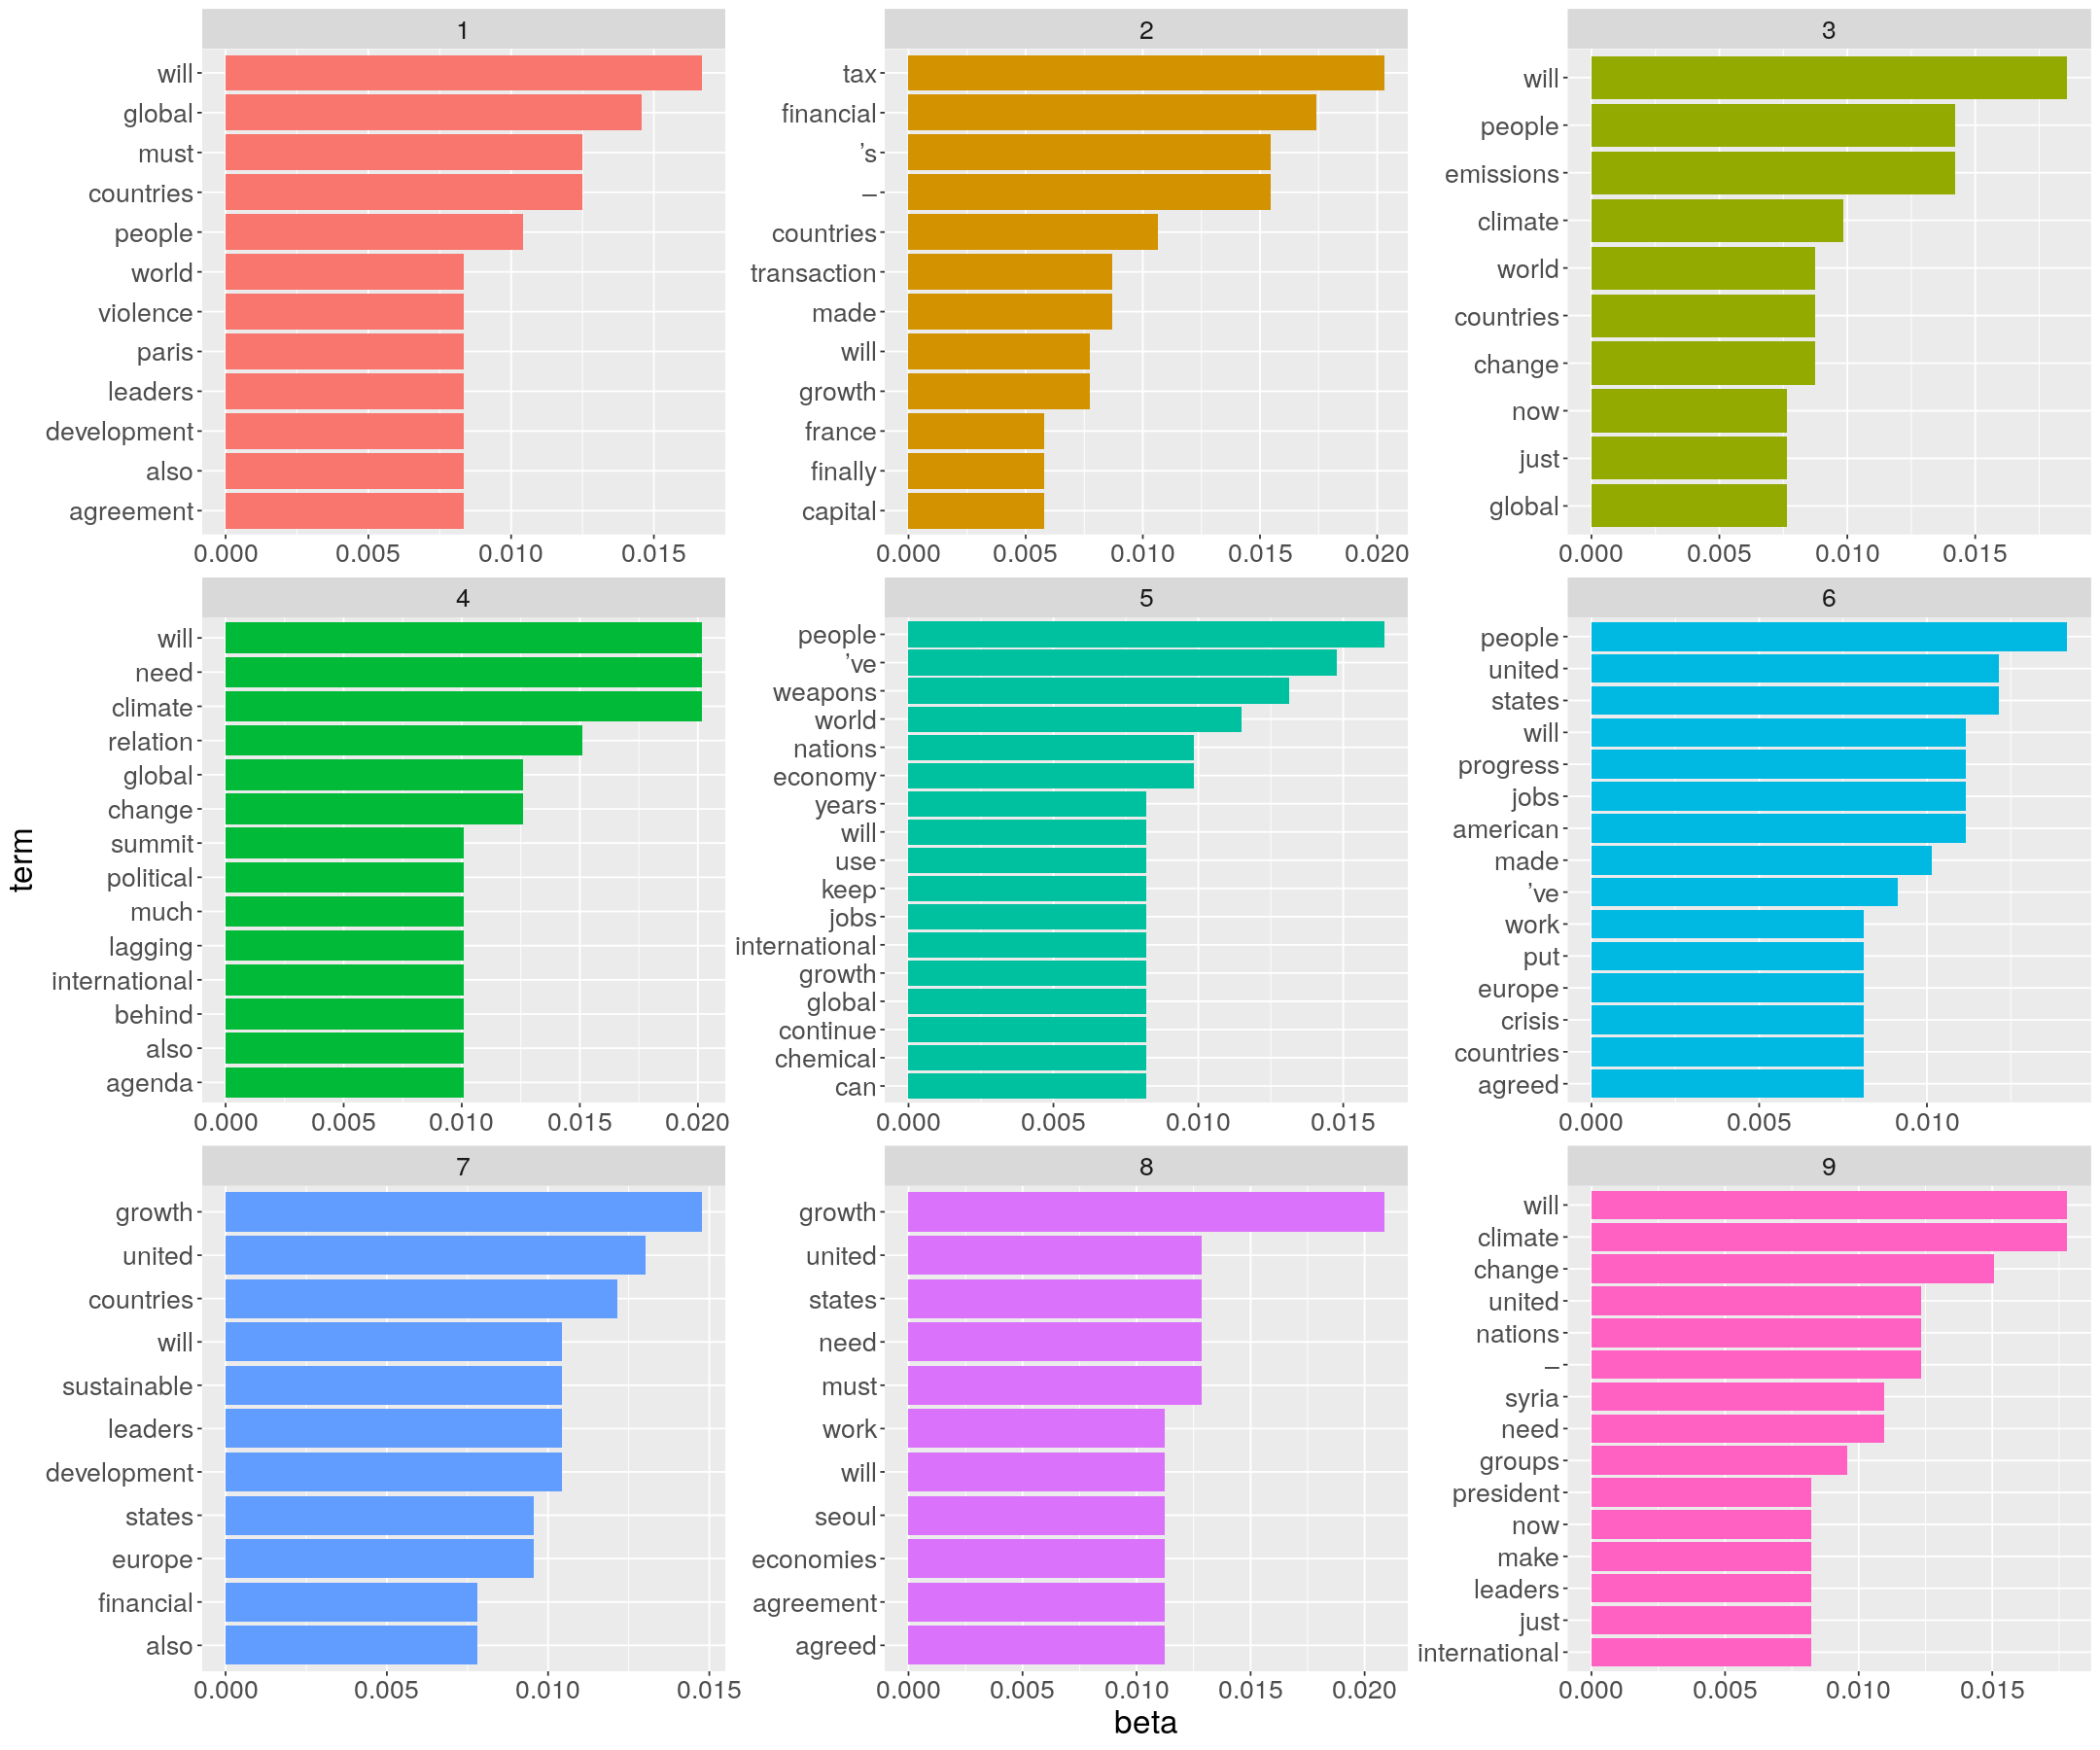

In [99]:
ap_top_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip() +
  theme(text=element_text(size=20)) +
  scale_x_reordered()

***

## Topic modeling at the sentence level

#### How many sentences do we have?

In [100]:
length(sentences$text)

[1] 646

#### `1` Given the number of sentences, let's consider ~20 topics

In [101]:
n_topics = 20
dtm <- document_term_matrix(sentences$text)
dtm <- DocumentTermMatrix(dtm)
dtm <- removeSparseTerms(dtm, 0.99)

Warning message in tm_map.SimpleCorpus(text, stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(text, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(text, removeWords, stopwords("english")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(text, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(text, removeNumbers):
“transformation drops documents”


As we are using sentences, there might be [errors](https://stackoverflow.com/questions/37802380/error-in-lda-in-r-each-row-of-the-input-matrix-needs-to-contain-at-least-one-no) in the creation of the document-term-matrix, e.g., short sentences mostly made of stopwords. To avoid this problem, we must run the code snippet below to fix our document-term-matrix

In [102]:
raw.sum <- apply(dtm, 1, FUN=sum) #sum by raw each raw of the table 
sentences <- sentences[raw.sum != 0,]
dtm <- dtm[raw.sum != 0,]

#### `2` Once again, we run LDA

In [104]:
ldaOut <- LDA(dtm, k = n_topics, control = list(alpha=0.1))

#### `3` This time, we want to check which sentences belong to which topic

We will use the `matrix` parameter to obtain this data

In [106]:
ap_documents <- tidy(ldaOut, matrix = "gamma")
head(ap_documents)

document,topic,gamma
<chr>,<int>,<dbl>
1,1,0.011122802
2,1,0.003337543
3,1,0.001726391
4,1,0.006257399
5,1,0.003337543
6,1,0.001726391
7,1,0.001726391
8,1,0.001390716
9,1,0.002706162


`gamma` represents how likely a sentence relates to a topic. 

In this example, most of the sentences are not related to topic 1 (i.e., `gamma < 0.01`). 

However, we desire sentences that seem related to the topic with a high probability (e.g., `gamma > 0.6`).

***

#### `4` We can filter sentences acording to a certain threshold for gamma

In [112]:
sentences_topics <- ap_documents %>% 
  rowwise() %>% 
  filter(gamma > 0.6) %>%
  mutate(text= sentences$text[as.numeric(document)]) %>%
  arrange(topic) %>%
  na.omit()

head(sentences_topics)

document,topic,gamma,text
<chr>,<int>,<dbl>,<fct>
35,1,0.9759176,"Just as the major advanced economies need to keep working to preserve stability among reserve currencies, emerging economies need to allow for currencies that are market-driven. This is something that I raised yesterday with President Hu of China, and we will continue to closely watch the appreciation of China’s currency."
36,1,0.9567624,All of us need to avoid actions that perpetuate imbalances and give countries an undue advantage over one another.
56,1,0.9735764,"Over the past two years, those of us in the G20 have worked together to rescue the global economy, to avert another depression, and to put us on the path to recovery."
62,1,0.8811094,Global demand is weakening.
100,1,0.9567624,"Now, over the past three years, these G20 summits have allowed our nations to pull the global economy back from a free fall and put us back on the path of recovery and growth."
101,1,0.9795428,"In the United States, our businesses have created jobs for 27 months in a row -- more than 4 million jobs in all -- and our highest priority continues to be putting people back to work even faster."


***

#### `5` Sample of sentences per topic

In [114]:
sample <- sentences_topics %>%
  filter(topic == 1)

head(sample %>% select(text), n=5)

text
<fct>
"Just as the major advanced economies need to keep working to preserve stability among reserve currencies, emerging economies need to allow for currencies that are market-driven. This is something that I raised yesterday with President Hu of China, and we will continue to closely watch the appreciation of China’s currency."
All of us need to avoid actions that perpetuate imbalances and give countries an undue advantage over one another.
"Over the past two years, those of us in the G20 have worked together to rescue the global economy, to avert another depression, and to put us on the path to recovery."
Global demand is weakening.
"Now, over the past three years, these G20 summits have allowed our nations to pull the global economy back from a free fall and put us back on the path of recovery and growth."


In [115]:
sample <- sentences_topics %>%
  filter(topic == 5)

head(sample %>% select(text), n=5)

text
<fct>
"Before I discuss the G20, I want to briefly comment on the agreement in Iraq that's taken place on the framework for a new government."
This agreement marks another milestone in the history of modern Iraq.
"And since our last meeting in Seoul we’ve experienced a number of new shocks -- disruptions in oil supplies, the tragic tsunami in Japan, and the financial crisis in Europe."
"That’s how we confronted our financial crisis in the United States -- having our banks submit to stress tests that were rigorous, increasing capital buffers, and passing the strongest financial reforms since the Great Depression."
And that’s the challenge that Europe now faces.


In [116]:
sample <- sentences_topics %>%
  filter(topic == 2)

head(sample %>% select(text), n=5)

text
<fct>
"And even as our countries work to save lives from the drought and terrible famine in the Horn of Africa, we agreed on the need to mobilize new resources to support the development that lifts nations out of poverty."
Let me begin by thanking President Putin and the people of St. Petersburg and the people of Russia for hosting this G20.
And that’s not the world that we want to live in.
Though many scientists suggest these figures or too moderate.
"We will enter a new decade, a decade that will define our future."


### Exercise: can you relate these sentences to our manually created codes?

***

<br>

### Challenges 

1. The biggest challenge with topic modeling is deciding a proper number of topics
  * A small number of topics will cluster together `unrelated documents`
  * A large number of topics will make documents per topic `too sparse`
1. The words in a topic might not be that insightful as `topics are derived from the data`. Sometimes, it's better to have some prior knowledge and `try to guide the creation` of topics ourselves
1. Defining thresholds (e.g., `gamma`) to fine-tune the model and cluster documents/sentences accordingly

***

# Research Commons: An interdisciplinary research-driven learning environment


### * Literature review
### * Systematic Review Search  Methodology
### * Citation Management
### * Thesis Formatting 


### * Nvivo Software Support



### * SPSS Software Support

<img style="float: right;" src="figures/research_commons_logo.png">


### * R Group



### * Multi-Disciplinary Graduate Student Writing Group

***

<img style="position: relative;" src="figures/background.png">

<img style="position: absolute; top: 50px; left: 200px; background: rgba(255,255,255, 0.5);" src="figures/thanks.png">



<center> <h1>Feedback</h1><h2>http://bit.ly/RCfeedbackwinter2018</h2> </center>


# References

1. [Text Mining with R](https://www.tidytextmining.com/)
1. [Qualitative Research in R](https://datascienceplus.com/qualitative-research-in-r/)
1. [An Introduction to Codes and   Coding](https://www.sagepub.com/sites/default/files/upm-binaries/24614_01_Saldana_Ch_01.pdf)
1. [topicmodels:  An R Package for Fitting Topic Models](https://cran.r-project.org/web/packages/topicmodels/vignettes/topicmodels.pdf)
1. [Text Mining for Social and Behavioral Research Using R](https://books.psychstat.org/textmining/index.html)
1. [Qualitative Data Science: Using RQDA to analyse interviews](https://lucidmanager.org/qualitative-data-science/)
1. [Sensemaking and Analytics for Organizations - A gentle introduction to topic modeling using R](https://eight2late.wordpress.com/2015/09/29/a-gentle-introduction-to-topic-modeling-using-r/)

